# Superstore Data Analysis Project.

## Import Libraries and Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette="rainbow", style='darkgrid')

In [2]:
df = pd.read_csv('./superstore_final_dataset.csv')

In [3]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

## Data Cleaning

#### Removing Unnecessary Columns

In [5]:
df.drop(labels=['Row_ID','Customer_Name'], axis=1, inplace=True)

#### Remove Duplicates

In [6]:
columns = df.columns

In [7]:
df.drop_duplicates(subset=columns[1:], ignore_index=True, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order_ID      9799 non-null   object 
 1   Order_Date    9799 non-null   object 
 2   Ship_Date     9799 non-null   object 
 3   Ship_Mode     9799 non-null   object 
 4   Customer_ID   9799 non-null   object 
 5   Segment       9799 non-null   object 
 6   Country       9799 non-null   object 
 7   City          9799 non-null   object 
 8   State         9799 non-null   object 
 9   Postal_Code   9788 non-null   float64
 10  Region        9799 non-null   object 
 11  Product_ID    9799 non-null   object 
 12  Category      9799 non-null   object 
 13  Sub_Category  9799 non-null   object 
 14  Product_Name  9799 non-null   object 
 15  Sales         9799 non-null   float64
dtypes: float64(2), object(14)
memory usage: 1.2+ MB


#### Converting Columns to appropicate data type and removing null values

In [9]:
df['Postal_Code'] = df['Postal_Code'].astype('object')

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9788 entries, 0 to 9798
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order_ID      9788 non-null   object 
 1   Order_Date    9788 non-null   object 
 2   Ship_Date     9788 non-null   object 
 3   Ship_Mode     9788 non-null   object 
 4   Customer_ID   9788 non-null   object 
 5   Segment       9788 non-null   object 
 6   Country       9788 non-null   object 
 7   City          9788 non-null   object 
 8   State         9788 non-null   object 
 9   Postal_Code   9788 non-null   object 
 10  Region        9788 non-null   object 
 11  Product_ID    9788 non-null   object 
 12  Category      9788 non-null   object 
 13  Sub_Category  9788 non-null   object 
 14  Product_Name  9788 non-null   object 
 15  Sales         9788 non-null   float64
dtypes: float64(1), object(15)
memory usage: 1.3+ MB


In [12]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="%d/%m/%Y")
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format="%d/%m/%Y")

In [13]:
df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


#### Removing rows where Shipping date is before Order Date

In [14]:
df = df[df['Ship_Date'] >= df['Order_Date']]

In [15]:
df['Shipped_in_Days'] = df[['Order_Date', 'Ship_Date']].apply(lambda x: x.Ship_Date-x.Order_Date, axis=1)
df['Shipped_in_Days'] = df['Shipped_in_Days'].dt.days

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9788 entries, 0 to 9798
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         9788 non-null   object        
 1   Order_Date       9788 non-null   datetime64[ns]
 2   Ship_Date        9788 non-null   datetime64[ns]
 3   Ship_Mode        9788 non-null   object        
 4   Customer_ID      9788 non-null   object        
 5   Segment          9788 non-null   object        
 6   Country          9788 non-null   object        
 7   City             9788 non-null   object        
 8   State            9788 non-null   object        
 9   Postal_Code      9788 non-null   object        
 10  Region           9788 non-null   object        
 11  Product_ID       9788 non-null   object        
 12  Category         9788 non-null   object        
 13  Sub_Category     9788 non-null   object        
 14  Product_Name     9788 non-null   object 

## Exploratory Data Analysis

In [17]:
df.describe()

,Sales,Shipped_in_Days
count,9788.000000,9788.000000
mean,230.110956,3.961177
std,625.333809,1.750542
min,0.444000,0.000000
25%,17.248000,3.000000
50%,54.376000,4.000000
75%,210.104000,5.000000
max,22638.480000,7.000000


In [18]:
df['Same_Day_Shipping'] = df[['Order_Date', 'Ship_Date']].apply(lambda x: True if x.Order_Date==x.Ship_Date else False, axis=1)

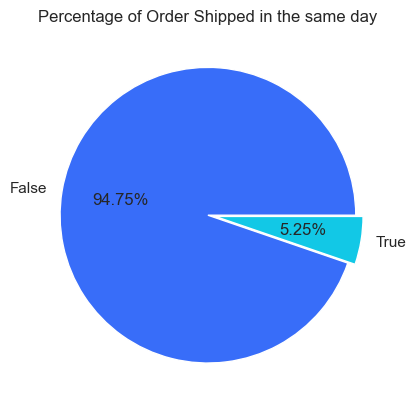

In [19]:
plt.pie(df['Same_Day_Shipping'].value_counts().values, labels=['False', 'True'], explode = [0,0.05], autopct='%.2f%%')

plt.title('Percentage of Order Shipped in the same day')
plt.show()

**Observation:** Almost 95% of the orders were not shipped on the same.

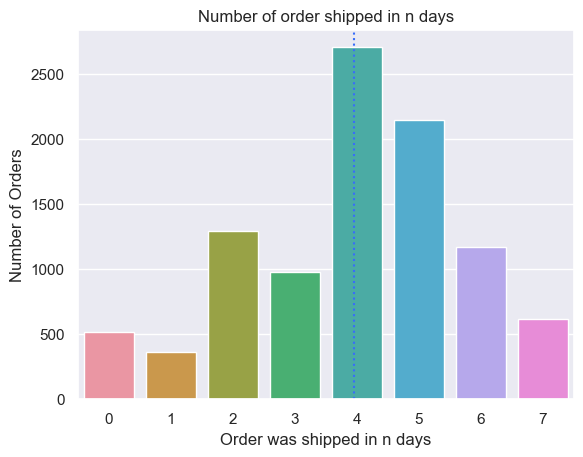

In [20]:
sns.countplot(data=df, x='Shipped_in_Days')
plt.axvline(x=df['Shipped_in_Days'].mean(), ls='dotted')
plt.xlabel('Order was shipped in n days')
plt.ylabel('Number of Orders')
plt.title('Number of order shipped in n days')
plt.show()

**Observation:** Base on the number of shipping, normally store ship their order between 2 to 6 days. But depending on the situation order can be shipped earlier or later. But every order was shipped with in 7 days.

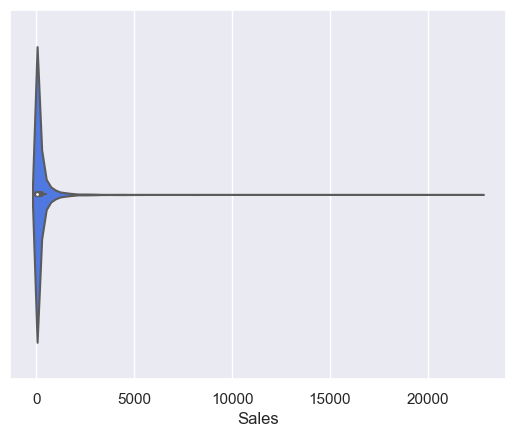

In [21]:
sns.violinplot(data=df, x='Sales')
plt.show()

**Observation:** Figure shows that sales values are heavily skewed towards right. And minimum and maximum sales values are close to 0 and more than 22000 respectively. Other than this informations it is hard to fugure out anything from this image.

In [22]:
# Top 5 Sales
df.sort_values(by=['Sales'], axis=0, ascending=False).head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Shipped_in_Days,Same_Day_Shipping
2697,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Home Office,United States,Jacksonville,Florida,32216.0,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferencing Unit,22638.480,5,False
6825,CA-2017-118689,2017-10-02,2017-10-09,Standard Class,TC-20980,Corporate,United States,Lafayette,Indiana,47905.0,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,7,False
8152,CA-2018-140151,2018-03-23,2018-03-25,First Class,RB-19360,Consumer,United States,Seattle,Washington,98115.0,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,2,False
2623,CA-2018-127180,2018-10-22,2018-10-24,First Class,TA-21385,Home Office,United States,New York City,New York,10024.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,2,False
4189,CA-2018-166709,2018-11-17,2018-11-22,Standard Class,HL-15040,Consumer,United States,Newark,Delaware,19711.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,5,False


In [23]:
# Bottom 5 Sales
df.sort_values(by=['Sales'], axis=0, ascending=True).head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Shipped_in_Days,Same_Day_Shipping
4100,US-2018-102288,2018-06-19,2018-06-23,Standard Class,ZC-21910,Consumer,United States,Houston,Texas,77095.0,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum,0.444,4,False
9291,CA-2018-124114,2018-03-02,2018-03-02,Same Day,RS-19765,Corporate,United States,Waco,Texas,76706.0,Central,OFF-BI-10004022,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,0.556,0,True
8657,CA-2017-168361,2017-06-21,2017-06-25,Standard Class,KB-16600,Corporate,United States,Chicago,Illinois,60623.0,Central,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Holder,0.836,4,False
4710,CA-2015-112403,2015-03-31,2015-03-31,Same Day,JO-15280,Consumer,United States,Philadelphia,Pennsylvania,19120.0,East,OFF-BI-10003529,Office Supplies,Binders,Avery Round Ring Poly Binders,0.852,0,True
2106,US-2015-152723,2015-09-26,2015-09-26,Same Day,HG-14965,Corporate,United States,Mesquite,Texas,75150.0,Central,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,0.876,0,True


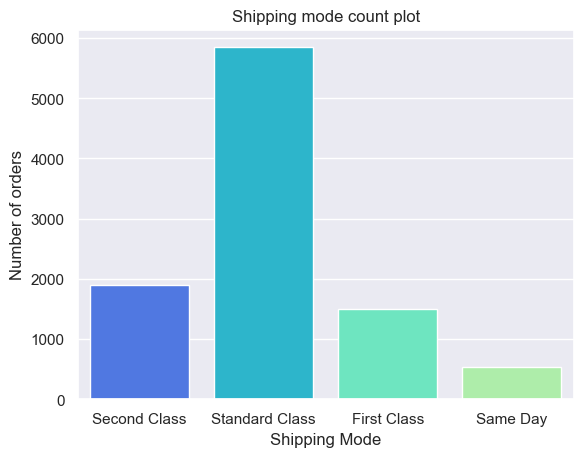

In [24]:
sns.countplot(data=df, x='Ship_Mode')
plt.title('Shipping mode count plot')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of orders')
plt.show()

**Observation:** Standard chipping is the most popular choice among the customers.

In [25]:
df[['Ship_Mode', 'Sales']].groupby('Ship_Mode').mean()

,Sales
Ship_Mode,
First Class,230.228020
Same Day,232.749143
Second Class,236.296149
Standard Class,227.827593


**Observation:** Shipping mode has no significant effect on the order values.

In [26]:
df['Product_ID'].nunique()

1860

In [27]:
df['Product_ID'].value_counts()

OFF-PA-10001970    18
TEC-AC-10003832    18
FUR-FU-10004270    16
TEC-AC-10002049    15
TEC-AC-10003628    15
                   ..
OFF-ST-10001034     1
TEC-PH-10001468     1
OFF-AR-10004974     1
TEC-AC-10003133     1
TEC-PH-10002645     1
Name: Product_ID, Length: 1860, dtype: int64

In [28]:
# Top 5 product by average sales value.
df[['Product_ID', 'Sales']].groupby('Product_ID').mean()['Sales'].nlargest(n=5)

Product_ID
TEC-MA-10002412    22638.4800
TEC-CO-10004722    12319.9648
TEC-MA-10004125     7999.9800
TEC-MA-10001047     7149.9450
TEC-MA-10001127     6124.9650
Name: Sales, dtype: float64

**Observation:** Store has significant variety of products. But most of their product sold only once. And highest amount of time a product was orders is only 20.

In [29]:
df['Category'].nunique()

3

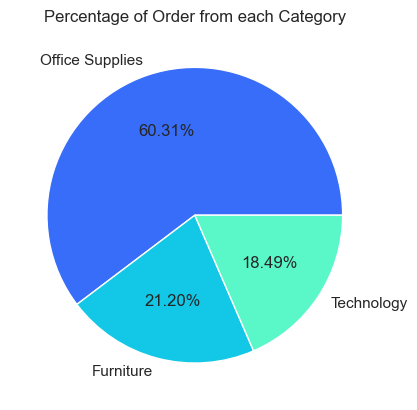

In [30]:
plt.pie(df['Category'].value_counts().values, labels=df['Category'].value_counts().index, autopct='%.2f%%')

plt.title('Percentage of Order from each Category')
plt.show()

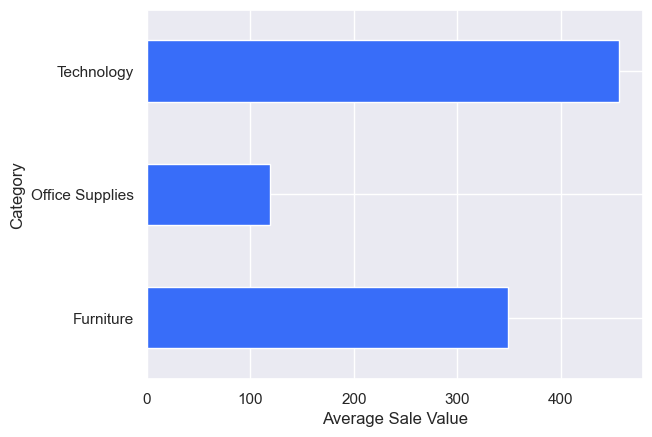

In [31]:
df[['Category', 'Sales']].groupby('Category').mean().plot(kind='barh', legend=False)
plt.xlabel('Average Sale Value')
plt.show()

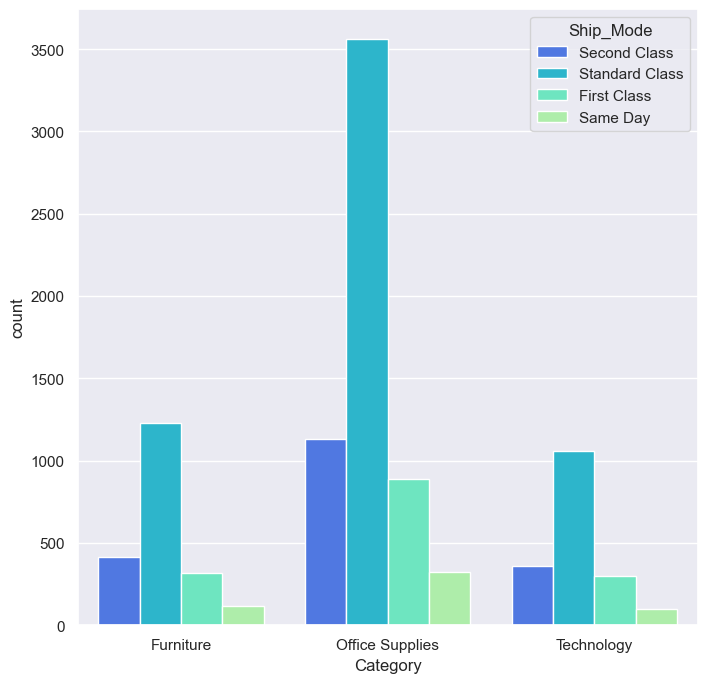

In [32]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='Category', hue='Ship_Mode')
plt.show()

**Observation:** Over 60 percent items sold in the sotre is office item. Average order value for office supply items are significantly lower that other categories. However by comparing the shiiping mode and item category, it is unlikely that how item is shipped has any relation with the item category.

In [33]:
df['Sub_Category'].nunique()

17

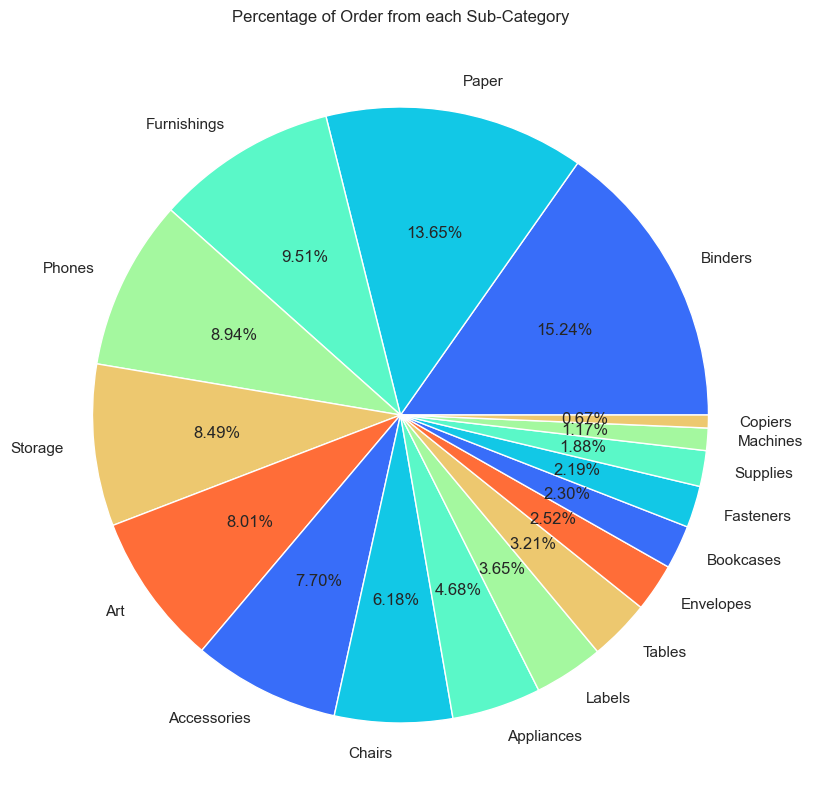

In [34]:
plt.figure(figsize=(10,10))
plt.pie(df['Sub_Category'].value_counts().values, labels=df['Sub_Category'].value_counts().index, autopct='%.2f%%')

plt.title('Percentage of Order from each Sub-Category')
plt.show()

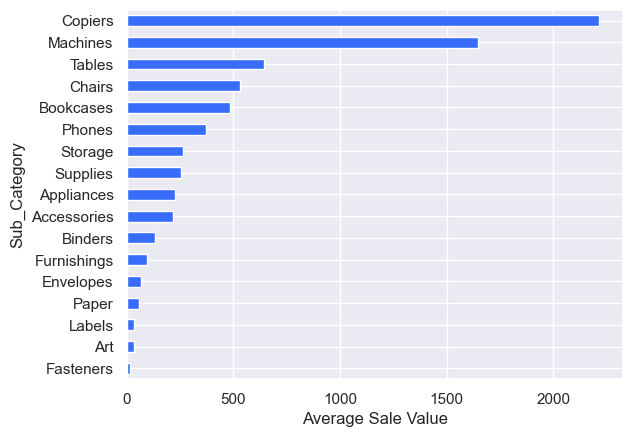

In [35]:
df[['Sub_Category', 'Sales']].groupby('Sub_Category').mean().sort_values(by=['Sales']).plot(kind='barh', legend=False)
plt.xlabel('Average Sale Value')
plt.show()

**Observation:** Copiers and Machines are by far the most expencive items in the the store however they are bottom of the list in terms of sale percentage. In terms of number of sale Binders and Paper out weight any sub category.

In [36]:
df['Country'].nunique()

1

In [37]:
df['State'].nunique()

48

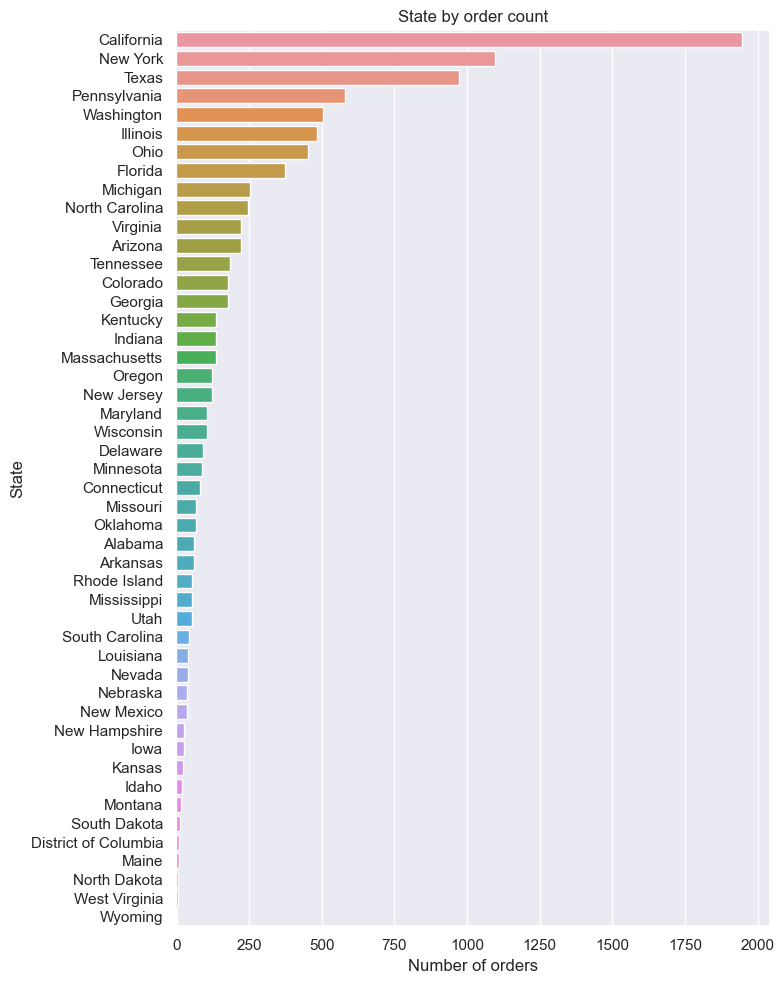

In [38]:
plt.figure(figsize=(8,10))
sns.countplot(data=df, y='State', order=df['State'].value_counts().index)
plt.title('State by order count')
plt.xlabel('Number of orders')
plt.ylabel('State')
plt.tight_layout()
plt.show()

**Observation:** Highest number of order came from California followed by New York, Texas and Pennsylvania. More than 40% order came from top 4 states.

In [39]:
df['City'].value_counts().nlargest(n=15)

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Houston          374
Chicago          308
Columbus         220
San Diego        170
Springfield      161
Dallas           156
Jacksonville     125
Detroit          115
Newark            92
Jackson           82
Name: City, dtype: int64

In [40]:
df['City'].value_counts().tail(15)

Lindenhurst      1
Palatine         1
Waterloo         1
Vacaville        1
Waukesha         1
Santa Maria      1
Redwood City     1
Bartlett         1
Billings         1
Missouri City    1
San Mateo        1
Cheyenne         1
Conway           1
Melbourne        1
Springdale       1
Name: City, dtype: int64

**Observation:** In terms of volume of sale New Tork comes at the top. For most of the cities number of order is just One.

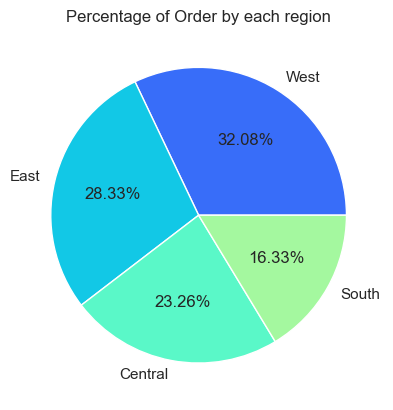

In [41]:
plt.pie(df['Region'].value_counts().values, labels=df['Region'].value_counts().index, autopct='%.2f%%')

plt.title('Percentage of Order by each region')
plt.show()

**Observation:** Overall sales follows a upward trend. Which indicates the companey is in upward trajectory.

In [42]:
df["Order_Year_Month"] = df["Order_Date"].apply(lambda x: x.strftime("%Y-%m"))
trend_data = df.groupby(by='Order_Year_Month').sum()['Sales'].reset_index()

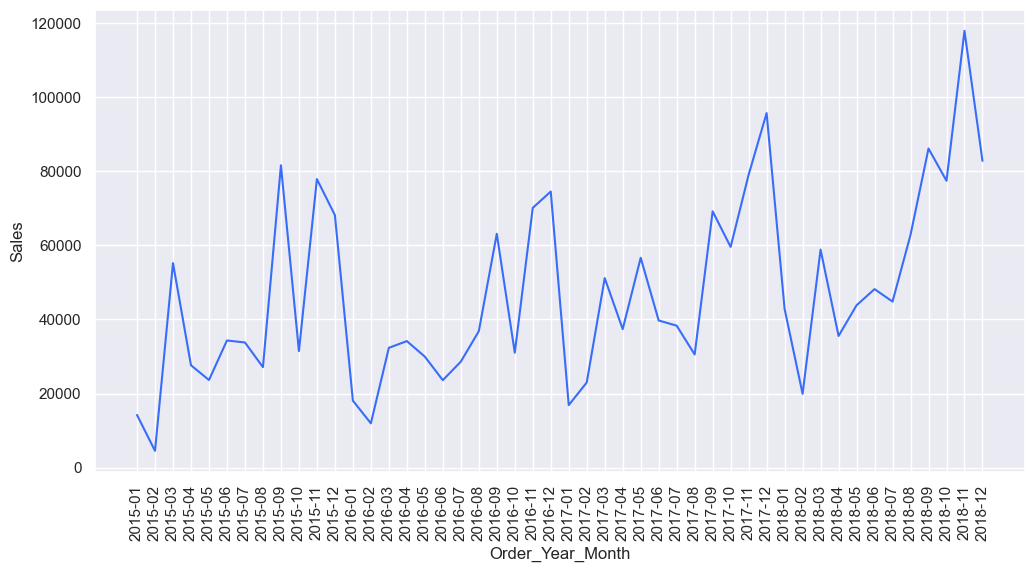

In [43]:
plt.figure(figsize=(12,6))
sns.lineplot(data=trend_data, x='Order_Year_Month', y='Sales')
plt.xticks(rotation='vertical')
plt.show()

In [44]:
trend_data['Year'] = trend_data['Order_Year_Month'].apply(lambda x: int(x.split("-")[0]))

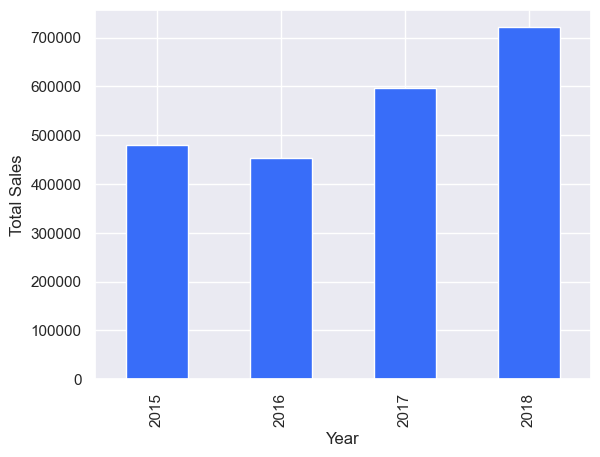

In [45]:
trend_data.groupby(by='Year').sum()['Sales'].plot(kind='bar')
plt.ylabel("Total Sales")
plt.show()

## Some Queries:

### To 10 Orders With highest cumulative value:

In [46]:
df.groupby(['Order_ID', 'City']).aggregate({'Sales':'sum'}).sort_values(by='Sales', ascending = False).head(10)

,,Sales
Order_ID,City,
CA-2015-145317,Jacksonville,23661.228
CA-2017-118689,Lafayette,18336.740
CA-2018-140151,Seattle,14052.480
CA-2018-127180,New York City,13716.458
CA-2015-139892,San Antonio,10539.896
CA-2018-166709,Newark,10499.970
CA-2015-116904,Minneapolis,9900.190
CA-2017-117121,Detroit,9892.740
US-2017-107440,Lakewood,9135.190


### Top and Bottom 10 Customers from each state by highest cumulative value:

In [47]:
top_customer_from_states = df.groupby(['State', 'Customer_ID'], as_index=False).aggregate({'Sales':'sum'}).sort_values(by='Sales', ascending = False)
print(top_customer_from_states.groupby('State').aggregate({'Sales':'max', 'Customer_ID':'first'}))

                          Sales Customer_ID
State                                      
Alabama                3236.410    MC-17425
Arizona                2200.328    JM-15865
Arkansas               1859.400    HL-15040
California             8341.290    KL-16645
Colorado               2613.309    SR-20425
Connecticut            1230.430    RS-19420
Delaware              10499.970    HL-15040
District of Columbia   2670.190    GT-14710
Florida               23661.228    SM-20320
Georgia                6412.770    CM-12385
Idaho                  1148.806    JD-16150
Illinois               3172.707    RL-19615
Indiana               18336.740    TC-20980
Iowa                   1423.340    DE-13255
Kansas                  787.850    TA-21385
Kentucky               4374.880    ME-17320
Louisiana              1665.620    AC-10450
Maine                   617.120    ML-17395
Maryland               3013.780    BM-11650
Massachusetts          2583.190    AJ-10780
Michigan               9892.740 

In [48]:
bottom_customer_from_states = df.groupby(['State', 'Customer_ID'], as_index=False).aggregate({'Sales':'sum'}).sort_values(by='Sales', ascending = True)
print(bottom_customer_from_states.groupby('State').aggregate({'Sales':'min', 'Customer_ID':'first'}))

                         Sales Customer_ID
State                                     
Alabama                  3.760    KN-16705
Arizona                  2.025    TS-21085
Arkansas                 4.300    KM-16375
California               3.984    JL-15130
Colorado                 1.188    PC-18745
Connecticut              3.520    JF-15490
Delaware                 7.920    MY-18295
District of Columbia    33.920    TC-21475
Florida                  1.167    KN-16450
Georgia                  2.780    SS-20410
Idaho                    3.304    NS-18640
Illinois                 0.836    KB-16600
Indiana                  2.910    TB-21595
Iowa                     6.480    LC-16870
Kansas                  18.900    SS-20590
Kentucky                 5.780    VB-21745
Louisiana               12.960    MC-18130
Maine                  106.080    PS-19045
Maryland                 7.830    BF-11170
Massachusetts            6.680    SC-20260
Michigan                 4.360    DC-12850
Minnesota  